# Exploratory Data Analysis on Dataset - Terrorism 
## Author : Laukit Mandal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [10]:
data = pd.read_csv("globalterrorismdb.csv", encoding='ISO-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [13]:
# Renaming the columns for better understanding
data.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)

In [14]:
# Deleting the unnecassary columns
data=data[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
           'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [15]:
data.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [16]:
data.describe

<bound method NDFrame.describe of         Year  Month  Extended  Day             Country                State  \
0       1970      7         0    2  Dominican Republic                  NaN   
1       1970      0         0    0              Mexico              Federal   
2       1970      1         0    0         Philippines               Tarlac   
3       1970      1         0    0              Greece               Attica   
4       1970      1         0    0               Japan              Fukouka   
5       1970      1         0    1       United States             Illinois   
6       1970      1         0    2             Uruguay           Montevideo   
7       1970      1         0    2       United States           California   
8       1970      1         0    2       United States            Wisconsin   
9       1970      1         0    3       United States            Wisconsin   
10      1970      1         0    1       United States            Wisconsin   
11      1970      

In [17]:
data.shape

(181691, 19)

In [18]:
# Checking if there is any null values in dataset
data.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

### Top 15 Countries With Most Terrorist attacks 

In [21]:
print(data['Country'].value_counts().head(15))

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64


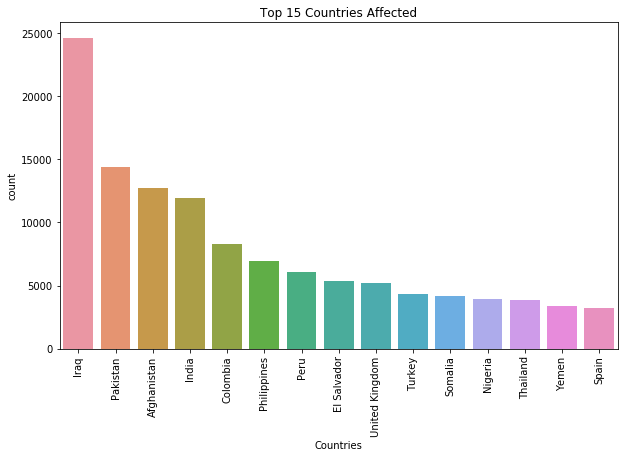

In [32]:
plt.figure(figsize = (10,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values)
plt.title('Top 15 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Conclusion 1 :
* Most Affected Country is <u>Iraq</u>.
* Among top 10 affected countries five are from <u>ASIA (Continent)</u>.

## States With most terrorist Attack

In [33]:
print(data['State'].value_counts().head(15))

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Name: State, dtype: int64


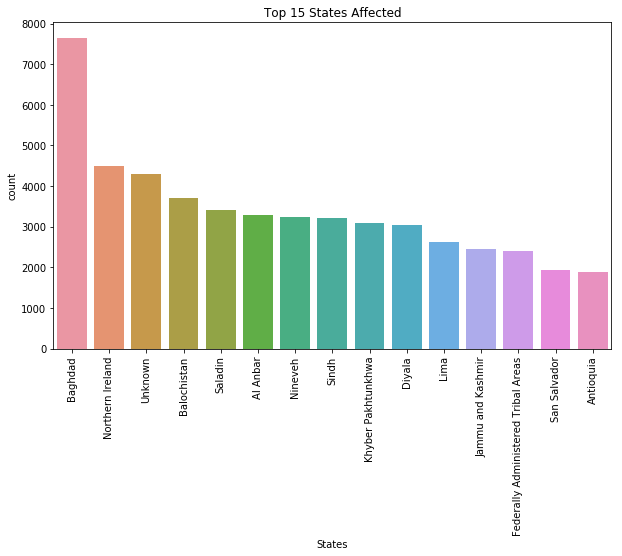

In [35]:
plt.figure(figsize = (10,6))
sns.barplot(data['State'].value_counts()[:15].index,data['State'].value_counts()[:15].values)
plt.title('Top 15 States Affected')
plt.xlabel('States')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Conclusion 2 :
* Most Affected State is <u> Baghdad </u>.


## Indian States With Most Terrorist Attacks

In [36]:
data_istates=data[data['Country']=='India']['State']
data_istates.value_counts()[:15]

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Name: State, dtype: int64

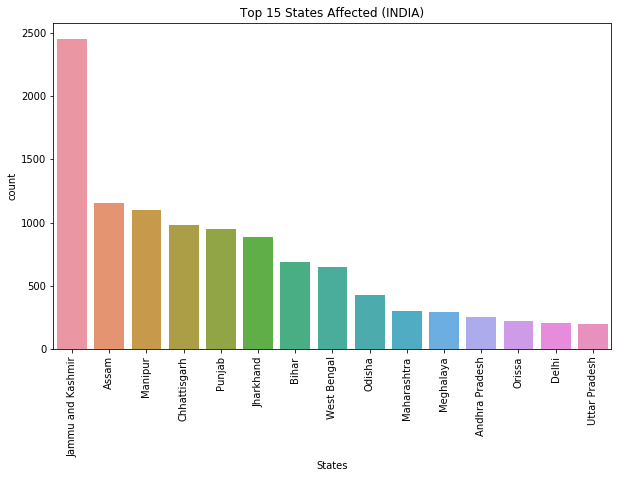

In [45]:
plt.figure(figsize = (10,6))
sns.barplot(data_istates.value_counts()[:15].index,data_istates.value_counts()[:15].values)
plt.title('Top 15 States Affected (INDIA)')
plt.xlabel('States')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Conclusion 3 :
* Most Affected State in India is <u>Jammu & Kashmir</u>.

## Years With Most Terrorist Activity


In [38]:
print(data['Year'].value_counts().head(15))

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
Name: Year, dtype: int64


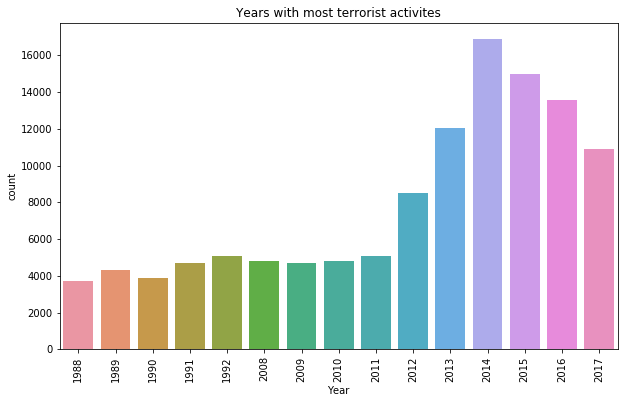

In [42]:
plt.figure(figsize = (10,6))
sns.barplot(data['Year'].value_counts()[:15].index,data['Year'].value_counts()[:15].values)
plt.title('Years with most terrorist activites')
plt.xlabel('Year')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Conclusion 4 :
* Year with the most Terrorist Activities (1988-2017) : <u>2014</u>.

## Regions With Most Terrorist Attacks

In [46]:
print(data['Region'].value_counts().head(15))

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64


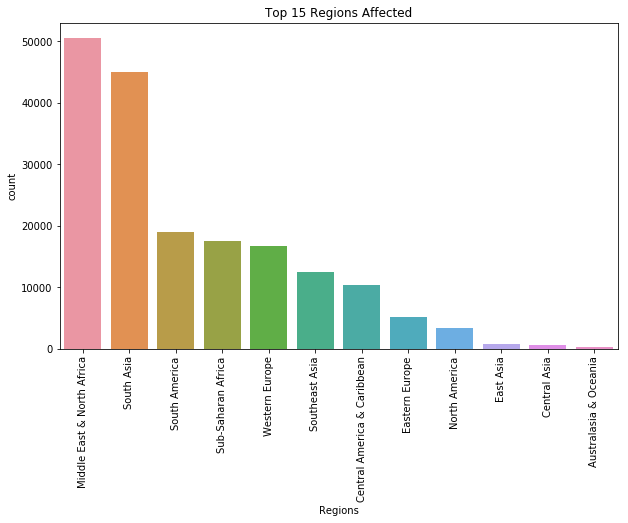

In [49]:
plt.figure(figsize = (10,6))
sns.barplot(data['Region'].value_counts()[:15].index,data['Region'].value_counts()[:15].values)
plt.title('Top 15 Regions Affected')
plt.xlabel('Regions')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Conclusion 5 :
* Most affected Region : <u>Middle East & North Africa</u>.

## Involved Terrorist Groups

In [50]:
print(data['Group'].value_counts().head(15))

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64


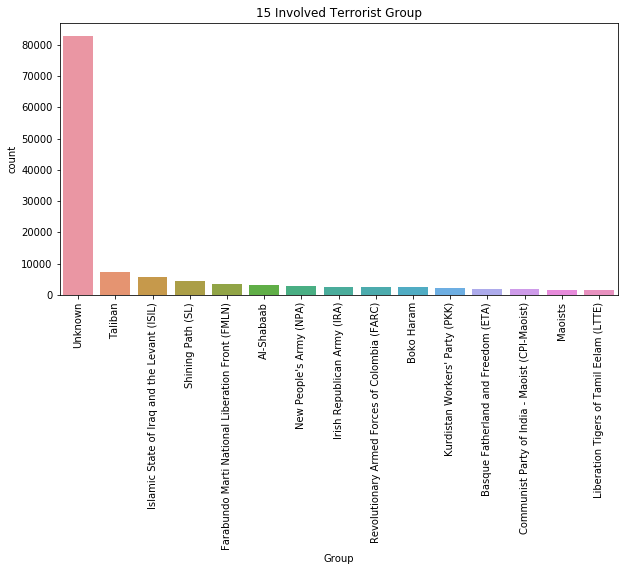

In [51]:
plt.figure(figsize = (10,5))
sns.barplot(data['Group'].value_counts()[:15].index,data['Group'].value_counts()[:15].values)
plt.title('15 Involved Terrorist Group')
plt.xlabel('Group')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Conclusion 6 :
* Most Active Terrorist Group After Unknown is : <u>Taliban</u>.

## Most Attack Type


In [64]:
print(data['AttackType'].value_counts().head(9))

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


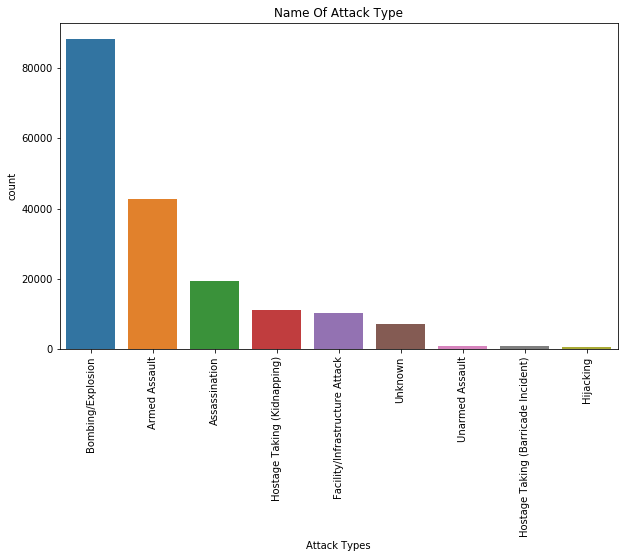

In [65]:
plt.figure(figsize = (10,6))
sns.barplot(data['AttackType'].value_counts()[:9].index,data['AttackType'].value_counts()[:9].values)
plt.title('Name Of Attack Type')
plt.xlabel('Attack Types')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Conclusion 6 :
* Most Attack Types: <u>Bombing/Explosion</u>.

# Final Conclusions:
### 1) Most Affected Country is Iraq.
### 2) Among top 10 affected countries five are from ASIA (Continent).
### 3) Most Affected State is Baghdad.
### 4) Most Affected State in India is Jammu & Kashmir.
### 5) Year with the most Terrorist Activities (1988-2017) : 2014.
### 6) Most affected Region : Middle East & North Africa.
### 7) Most Active Terrorist Group After Unknown is : Taliban.
### 8) Most Attack Types: Bombing/Explosion.